## Import Libraries

In [8]:
# To store data
import pandas as pd

# To do linear algebra
import numpy as np
from numpy import pi

# To list files
from glob import glob

# To create plots
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# To create nicer plots
import seaborn as sns

# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# To get new datatypes and functions
from collections import Counter
from cycler import cycler

# To investigate distributions
from scipy.stats import norm, skew, probplot
from scipy.optimize import curve_fit

# To build models
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, SpectralEmbedding, LocallyLinearEmbedding
from sklearn.manifold import SpectralEmbedding

# To gbm light
# from lightgbm import LGBMClassifier

# To measure time
from time import time

## Transfer As DataFrame

### Cotton Dataset

In [ ]:
# record_paths_cotton = glob("/Users/liuziyi/Documents/ZJU/张初/raw/**/*.xlsx", recursive=True)

# record_list = []
# for rpc in record_paths_cotton:
#     record = pd.read_excel(rpc, header=None, index=None)
#     record['subtype'] = rpc.split('/')[-2]
#     record_list.append(record)
# df_records_cotton = pd.concat(record_list, axis=0, ignore_index=True)
# df_records_cotton['type'] = 'cotton'
# df_records_cotton.rename(dict(zip(range(200), list(map(lambda x: 'band_' + str(x), range(200))))), axis=1, inplace=True)
# df_records_cotton.to_csv('./df_records_cotton.csv')
# df_records_cotton.head()

In [2]:
# load dataframe
df_records_cotton = pd.read_csv('./df_records_cotton.csv')

X_columns = [c for c in df_records_cotton.columns if 'band_' in c]
y_column  = 'subtype'

subtype_counts = df_records_cotton[y_column].value_counts()

print(df_records_cotton[X_columns].shape)
print(subtype_counts)

(13038, 200)
jinxin7             2497
jinxin5             2353
shennongmian1       2120
xinluzhong42        2111
xinluzhong52        1804
xinluzaomian29      1122
xinjiangzaomian1    1031
Name: subtype, dtype: int64


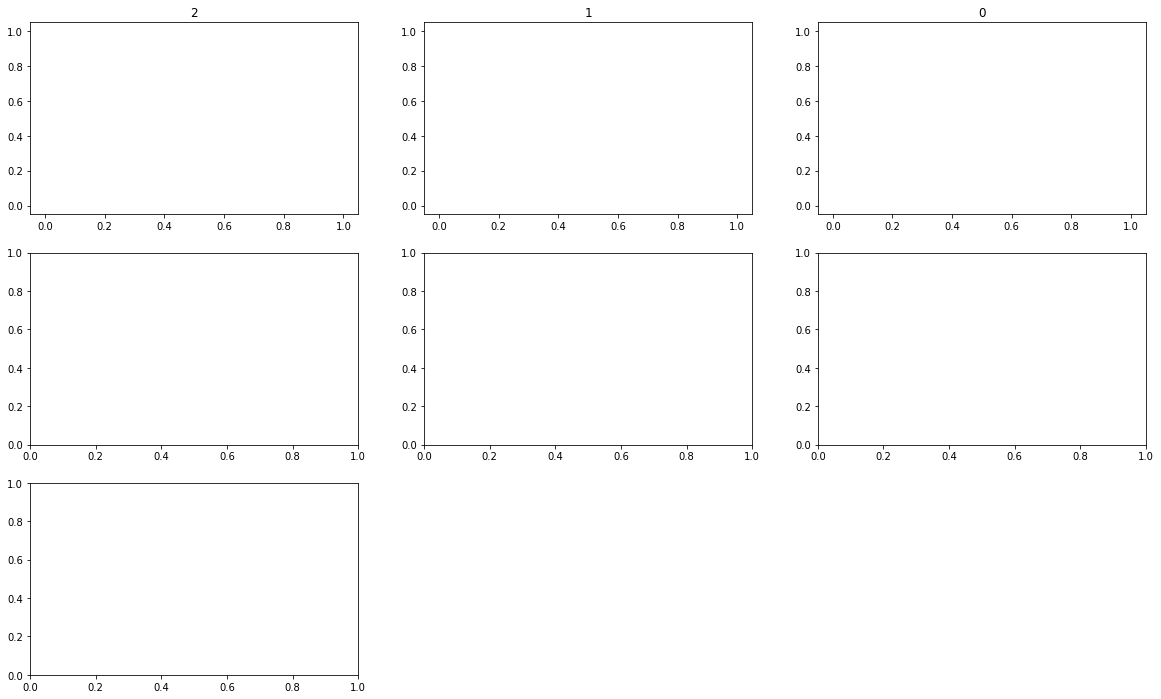

In [12]:
# check data
def plot_matrix(mat, axis, title):
    rows, cols = mat.shape
    x = np.expand_dims(range(cols), axis=1).repeat(rows, axis=1)
    y = mat.T
    axis.plot(x, y)
    axis.set_title(title)

def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

fig, axes = plt.subplots(3, 3, figsize=(20, 12))
axes = trim_axs(axes, 7)
for ax, index in zip(axes, subtype_counts.index):
    df_plot = df_records_cotton[df_records_cotton[y_column] == index]
    plot_matrix(df_plot[X_columns].values, ax, index)
plt.show()

In [4]:
# separability
n = len(subtype_counts)
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

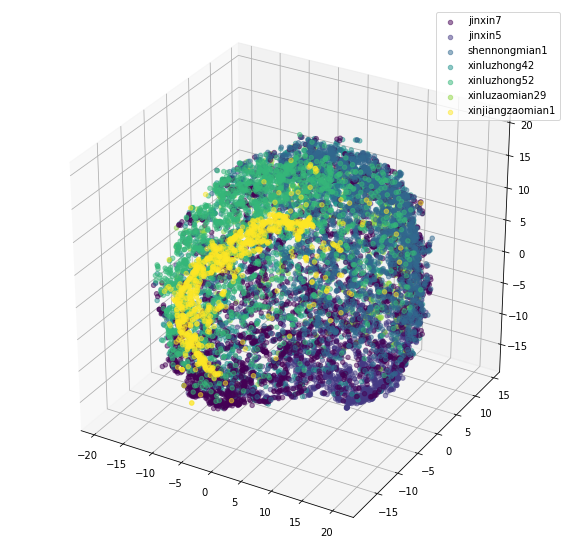

In [30]:
# TSNE
tsne_data = df_records_cotton[X_columns]
tsne = TSNE(random_state=0, n_components=3)
tsne_transformed = tsne.fit_transform(tsne_data)

fig = plt.figure(figsize=(10, 10))
axis = fig.add_subplot(111, projection='3d')
for i, group in enumerate(subtype_counts.index):
    mask = (df_records_cotton[y_column] == group).values
    axis.scatter(tsne_transformed[mask][:, 0], tsne_transformed[mask][:, 1], tsne_transformed[mask][:, 2], c=colors[i], alpha=0.5, label=group)
axis.legend()
plt.show()

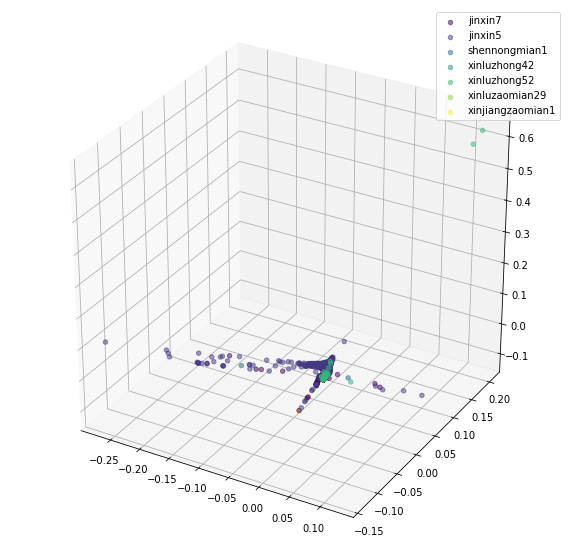

In [5]:
# LocallyLinearEmbedding
lle_data = df_records_cotton[X_columns]
lle = LocallyLinearEmbedding(random_state=0, n_components=3)
lle_transformed = lle.fit_transform(lle_data)

fig = plt.figure(figsize=(10, 10))
axis = fig.add_subplot(111, projection='3d')
for i, group in enumerate(subtype_counts.index):
    mask = (df_records_cotton[y_column] == group).values
    axis.scatter(lle_transformed[mask][:, 0], lle_transformed[mask][:, 1], lle_transformed[mask][:, 2], c=colors[i], alpha=0.5, label=group)
axis.legend()
plt.show()

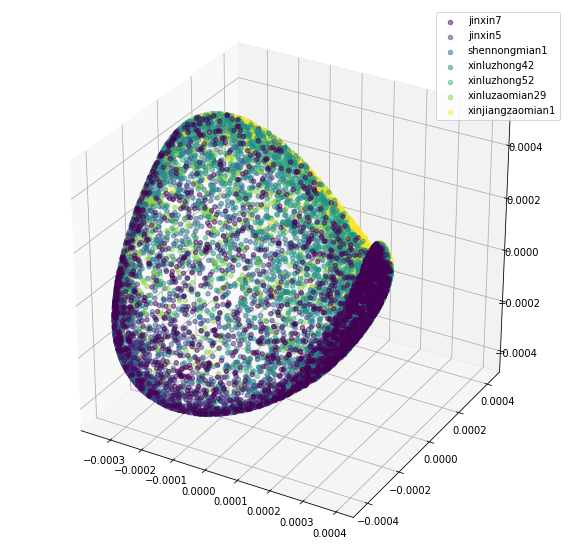

In [7]:
# LocallyLinearEmbedding
se_data = df_records_cotton[X_columns]
se = SpectralEmbedding(random_state=0, n_components=3)
se_transformed = se.fit_transform(se_data)

fig = plt.figure(figsize=(10, 10))
axis = fig.add_subplot(111, projection='3d')
for i, group in enumerate(subtype_counts.index):
    mask = (df_records_cotton[y_column] == group).values
    axis.scatter(se_transformed[mask][:, 0], se_transformed[mask][:, 1], se_transformed[mask][:, 2], c=colors[i], alpha=0.5, label=group)
axis.legend()
plt.show()

### Soybean Dataset

In [ ]:
# record_paths_soybean = glob("/Users/liuziyi/Documents/ZJU/张初/raw/**/*.csv", recursive=True)

# record_list = []
# for rpc in record_paths_soybean:
#     record = pd.read_csv(rpc, header=None)
#     record.rename(columns={200: 'subtype'}, inplace=True) #['subtype'] = record.iloc[0, -1] # rpc.split('/')[-2]
#     record_list.append(record)
# df_records_soybean = pd.concat(record_list, axis=0, ignore_index=True)
# df_records_soybean['type'] = 'soybean'
# df_records_soybean.rename(dict(zip(range(200), list(map(lambda x: 'band_' + str(x), range(200))))), axis=1, inplace=True)
# df_records_soybean.to_csv('./df_records_soybean.csv')
# df_records_soybean.head()

In [10]:
# load dataframe
df_records_soybean = pd.read_csv('./df_records_soybean.csv')

X_columns = [c for c in df_records_soybean.columns if 'band_' in c]
y_column  = 'subtype'

subtype_counts = df_records_soybean[y_column].value_counts()

print(df_records_soybean[X_columns].shape)
print(subtype_counts)

(5670, 200)
2    1890
1    1890
0    1890
Name: subtype, dtype: int64


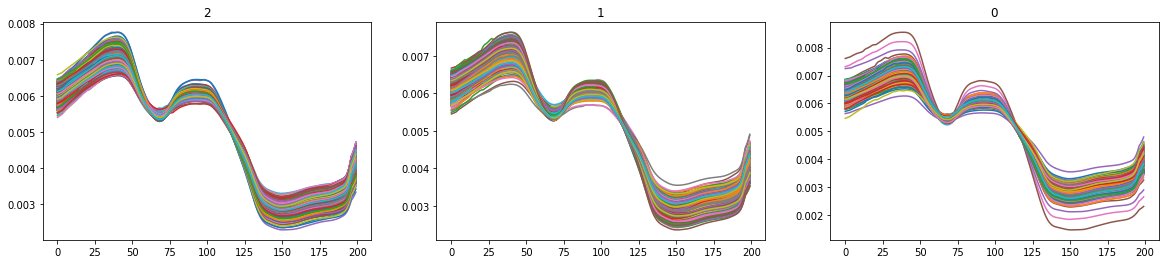

In [13]:
# check data
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
for ax, index in zip(axes, subtype_counts.index):
    df_plot = df_records_soybean[df_records_soybean[y_column] == index]
    plot_matrix(df_plot[X_columns].values, ax, index)
plt.show()

In [14]:
# separability
n = len(subtype_counts)
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

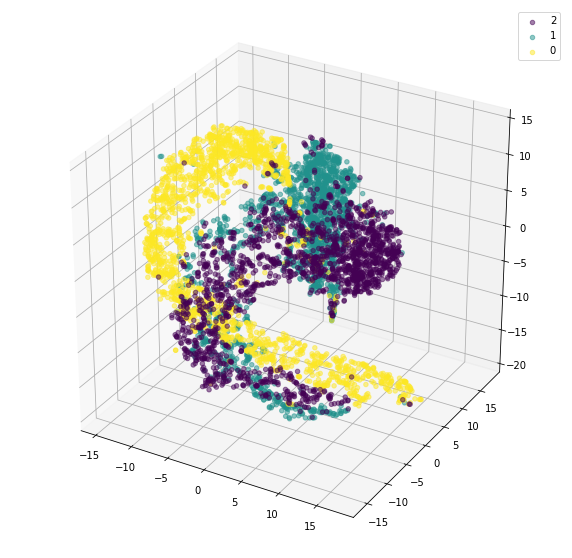

In [15]:
# TSNE
tsne_data = df_records_soybean[X_columns]
tsne = TSNE(random_state=0, n_components=3)
tsne_transformed = tsne.fit_transform(tsne_data)

fig = plt.figure(figsize=(10, 10))
axis = fig.add_subplot(111, projection='3d')
for i, group in enumerate(subtype_counts.index):
    mask = (df_records_soybean[y_column] == group).values
    axis.scatter(tsne_transformed[mask][:, 0], tsne_transformed[mask][:, 1], tsne_transformed[mask][:, 2], c=colors[i], alpha=0.5, label=group)
axis.legend()
plt.show()

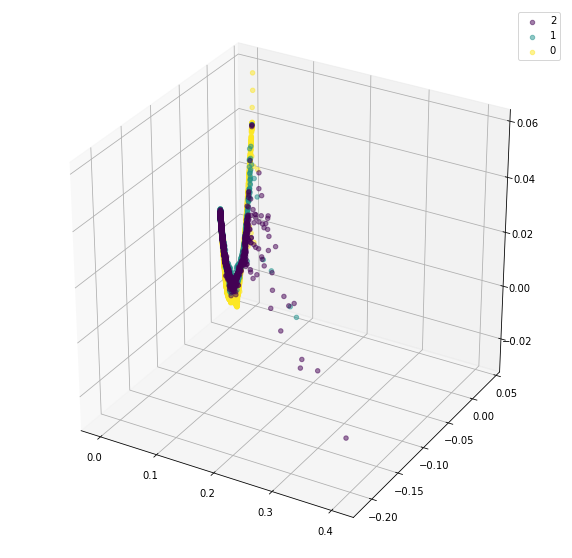

In [16]:
# LocallyLinearEmbedding
lle_data = df_records_soybean[X_columns]
lle = LocallyLinearEmbedding(random_state=0, n_components=3)
lle_transformed = lle.fit_transform(lle_data)

fig = plt.figure(figsize=(10, 10))
axis = fig.add_subplot(111, projection='3d')
for i, group in enumerate(subtype_counts.index):
    mask = (df_records_soybean[y_column] == group).values
    axis.scatter(lle_transformed[mask][:, 0], lle_transformed[mask][:, 1], lle_transformed[mask][:, 2], c=colors[i], alpha=0.5, label=group)
axis.legend()
plt.show()

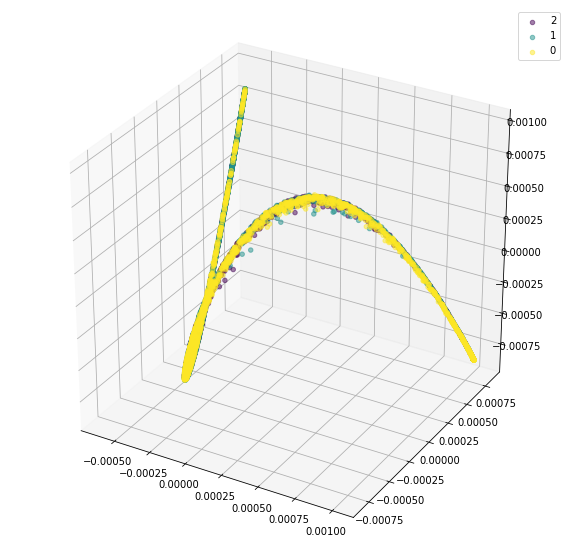

In [17]:
# LocallyLinearEmbedding
se_data = df_records_soybean[X_columns]
se = SpectralEmbedding(random_state=0, n_components=3)
se_transformed = se.fit_transform(se_data)

fig = plt.figure(figsize=(10, 10))
axis = fig.add_subplot(111, projection='3d')
for i, group in enumerate(subtype_counts.index):
    mask = (df_records_soybean[y_column] == group).values
    axis.scatter(se_transformed[mask][:, 0], se_transformed[mask][:, 1], se_transformed[mask][:, 2], c=colors[i], alpha=0.5, label=group)
axis.legend()
plt.show()